# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Advanced Machine Learning Methods (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Dr. José Antonio Cantoral Ceballos
#### 👩‍🏫 **Assistant Professor:** Dra. Yetnalezi Quintas Ruiz

### 📊 **Activity 1a: Implementing a Multilayer Fully Connected Network using Numpy**

#### 📅 **January 27th, 2025**

### 👥 Team 3

#### **Students:**
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)
* 🧑‍💻 Javier Augusto Rebull Saucedo (A01795838)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Juan Carlos Pérez Nava (A01795941)
* 🧑‍💻 Oscar Enrique García García (A01016093)

---

# **TC 5033**
## **Deep Learning**
## **Fully Connected Deep Neural Networks**


#### Activity 1a: Implementing a Multilayer Fully Connected Network using Numpy
#### Non-graded activity (0 points)

- Objective

The primary objective of this activity is to deepen your understanding of Fully Connected Networks by implementing a multilayer network using only Numpy. You  are  given  the follosing starter code that solves the MNIST dataset problem. Your task is to read, understand, and then apply this knowledge to solve classification problems on other datasets such as the Kaggle ASL dataset (Starter code will be provided separately for that activity).

- Instructions

    Read and Understand the following Code: The provided starter code outlines the architecture of a Fully Connected Network designed to classify MNIST images. Go through the code to understand how each function and class is used to implement the network.

    Understand the Math: Make sure you understand the math operations implemented in the code, especially during the forward and backward passes. This will involve matrix multiplications, activation functions, loss computations, and backpropagation.
    
- Experiment
    You are encouraged to play with the code, change any hyperparameters and train the model, you should be able to achieve over 95% accuracy on the test set without problems.


# **Number recognition**

Number recognition was one of the first applications were images needed to be recognized. Based on hand-written numbers provided by the United States postal service....

## **The MNIST Dataset**
![Online Image](https://production-media.paperswithcode.com/datasets/MNIST-0000000001-2e09631a_09liOmx.jpg)

Text here

# **Code**

### Initialization

In this section the libraries required for the correct execution of the code are loaded.

Also, the root folder for the files used in the notebook is defined.

In [153]:
# Data manipulation and numerical operations
import numpy as np                      # For numerical operations and array manipulations

# Visualization libraries
import matplotlib.pyplot as plt         # For creating static visualizations
%matplotlib inline

#Colab and system
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/AMLM_Team03/') #Set directory to shared folder of Team 3 for the Advanced Machine Learning Methods January 2025 class

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Images

The `get_images` code was previously added to the root folder. This code will help with the handling and management of the images for Python to be able to read them. Basically it takes the `.gz` files downloaded from the original website and transform this data into a format that can be handled by the neural netowk model.

With a total of 70000 samples, 50000 of them will be used as the training set; 10000 for the validation set and leaving the remaining 10000 for the testing set. The files also contain the correct labels for each sample to use a supervised learning approach.

Each sample consists of a 28x28 pixel image. Each pixel contains a value from 0 to 255 that represents the darknes intensity of the pixel, where 0 means that is is completely white and 255 is fully black. Also, the 28x28 is flattened to end up with a total of 784 pixels in a single dimension.

`get_images` will handle all the operations to retrieve the data in the correct format to be able to use it later in the code as needed.

In [154]:
from get_images import get_images #Import get_images library

In [155]:
# MNIST path
mnist_path = './mnist_raw/'
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)   #Save the files in variables for handling after calling the get_images()

x_train = x_train_num[:50000].reshape(50000, -1).astype(float)
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(float)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(float)
y_test = y_test_num.copy().reshape(10000, 1)

# Print shapes with enhanced formatting (notebook-friendly version)
print("\n" + "="*50)
print("🔄 DATA SETS SIZE AFTER PROCESSING 🔄".center(50))
print("="*50)

print(f"\n📊 Original Data:")
print(f"   └─ Total samples: {x_train.shape[0]+x_val.shape[0]+x_test.shape[0]}")

print(f"\n📊 Training Data:")
print(f"   ├─ Features (x_train): {x_train.shape}")
print(f"   └─ Labels (y_train):   {y_train.shape}")

print(f"\n🎯 Validation Data:")
print(f"   ├─ Features (x_val):   {x_val.shape}")
print(f"   └─ Labels (y_val):     {y_val.shape}")

print(f"\n🎯 Test Data:")
print(f"   ├─ Features (x_val):   {x_test.shape}")
print(f"   └─ Labels (y_val):     {y_test.shape}")
print("\n" + "="*50 + "\n")


# Print statistical summaries
print("\n" + "="*60)
print("📊 ORIGINAL DATA STATISTICS 📊".center(60))
print("="*60 + "\n")

print("📈 Current Statistics:")
print("─"*30)
print(f"• Mean:               {x_train.mean():.4f}")
print(f"• Standard Deviation: {x_train.std():.4f}")
print(f"• Minimum Value:      {x_train.min()}")
print(f"• Maximum Value:      {x_train.max()}")
print(f"• Range:             {x_train.max() - x_train.min()}")

print("\n" + "="*60)


       🔄 DATA SETS SIZE AFTER PROCESSING 🔄        

📊 Original Data:
   └─ Total samples: 70000

📊 Training Data:
   ├─ Features (x_train): (50000, 784)
   └─ Labels (y_train):   (50000, 1)

🎯 Validation Data:
   ├─ Features (x_val):   (10000, 784)
   └─ Labels (y_val):     (10000, 1)

🎯 Test Data:
   ├─ Features (x_val):   (10000, 784)
   └─ Labels (y_val):     (10000, 1)



                📊 ORIGINAL DATA STATISTICS 📊                

📈 Current Statistics:
──────────────────────────────
• Mean:               33.3951
• Standard Deviation: 78.6662
• Minimum Value:      0.0
• Maximum Value:      255.0
• Range:             255.0



In [156]:
def normalise(x_mean, x_std, x_data):
    """
    Normalize data using z-score normalization (standardization).

    Parameters:
    -----------
    x_mean : float
        The mean value of the original dataset
    x_std : float
        The standard deviation of the original dataset
    x_data : array-like
        The data to be normalized

    Returns:
    --------
    array-like
        Normalized data with mean ≈ 0 and standard deviation ≈ 1

    Formula:
    --------
    z = (x - μ) / σ
    where:
        z = normalized value
        x = original value
        μ = mean of the distribution
        σ = standard deviation of the distribution
    """

    # Subtract the mean (centering the data around 0)
    # Then divide by standard deviation (scaling the data)
    # This transforms the data to have mean=0 and std=1
    return (x_data - x_mean) / x_std

In [157]:
# Calculate mean and standard deviation from training data
x_mean = x_train.mean()  # Compute the mean of training data
x_std = x_train.std()    # Compute the standard deviation of training data

# Normalize all datasets using training statistics
# Important: We use training mean/std for all sets to prevent data leakage
x_train = normalise(x_mean, x_std, x_train)  # Normalize training data
x_val = normalise(x_mean, x_std, x_val)      # Normalize validation data using training stats
x_test = normalise(x_mean, x_std, x_test)    # Normalize test data using training stats

# Print statistical summaries
print("\n" + "="*60)
print("📊 NORMALIZED DATA STATISTICS 📊".center(60))
print("="*60 + "\n")

print("📈 Current Statistics:")
print("─"*30)
print(f"• Mean:               {x_train.mean():.4f}")
print(f"• Standard Deviation: {x_train.std():.4f}")
print(f"• Minimum Value:      {x_train.min():.4f}")
print(f"• Maximum Value:      {x_train.max():.4f}")
print(f"• Range:             {x_train.max() - x_train.min():.4f}")

print("\n" + "="*60)


               📊 NORMALIZED DATA STATISTICS 📊               

📈 Current Statistics:
──────────────────────────────
• Mean:               -0.0000
• Standard Deviation: 1.0000
• Minimum Value:      -0.4245
• Maximum Value:      2.8170
• Range:             3.2415



### Plot samples

In [158]:
def plot_mnist_samples(x_data, y_data, n_samples=3, random_seed=None):
    """
    Visualize random MNIST number samples.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    n_samples : int, optional (default=3)
        Number of random samples to display
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """

    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Set up the figure with adequate size
    plt.figure(figsize=(2*n_samples, 2))

    # Plot each random sample
    for i in range(n_samples):
        # Generate random index
        idx = np.random.randint(len(y_data))

        # Create subplot
        plt.subplot(1, n_samples, i+1)

        # Reshape and display image
        img = x_data[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        # Add title with number information
        plt.title(f'Number: {y_data[idx]}',
                 fontsize=10,
                 pad=10,
                 fontweight='bold')

        # Remove axes for cleaner visualization
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


         🔢 MNIST Numbers Visualization 🔢          


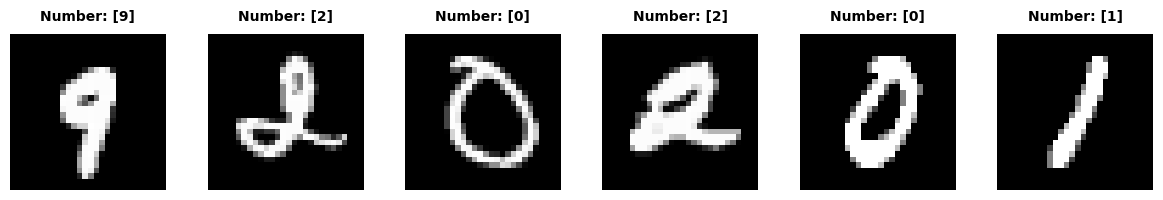

In [159]:
# Example usage with test data
def plot_single_mnist(x_data, y_data, random_seed=None):
    """
    Visualize a single random MNIST number sample.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """
    plot_mnist_samples(x_data, y_data, n_samples=1, random_seed=random_seed)

# Print information about displayed samples
print("\n" + "="*50)
print("🔢 MNIST Numbers Visualization 🔢".center(50))
print("="*50)

# Example calls:
# For multiple samples
plot_mnist_samples(x_test, y_test, n_samples=6)

# For a single sample
# plot_single_mnist(x_test, y_test)

# 📐 Equations for our Model

## Neural Network Forward Pass and Loss Calculation Equations

--------------------------------------------------------------------
1️⃣ First Layer (Input → Hidden Layer)
--------------------------------------------------------------------
$$z^1 = W^1 X + b^1$$

- W¹: Weight matrix for first layer
- X:  Input data
- b¹: Bias vector
- z¹: Pre-activation values

--------------------------------------------------------------------
2️⃣ Activation Function
--------------------------------------------------------------------
$$a^1 = ReLU(z^1)$$

- ReLU(x) = max(0,x)
- Keeps positive values
- Sets negative values to 0
- a¹: Activated values of hidden layer

--------------------------------------------------------------------
3️⃣ Second Layer (Hidden → Output Layer)
--------------------------------------------------------------------
$$z^2 = W^2 a^1 + b^2$$

- W²: Weight matrix for second layer
- a¹: Activated values from previous layer
- b²: Bias vector
- z²: Pre-activation output values

--------------------------------------------------------------------
4️⃣ Softmax Function (Probability Distribution)
--------------------------------------------------------------------
$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$

- e^z: Exponential of each output
- Denominator normalizes values
- ŷ: Predicted probabilities (sum to 1)

--------------------------------------------------------------------
5️⃣ Cross-Entropy Loss (Single Sample)
--------------------------------------------------------------------
$$ \mathcal{L}(\hat{y}^{i}, y^{i}) = - y^{i} \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$

- y^i: True label (one-hot encoded)
- ŷ^i: Predicted probability
- ln: Natural logarithm

--------------------------------------------------------------------
6️⃣ Cost Function (Average Loss)
--------------------------------------------------------------------
$$ \mathcal{J}(w, b) = \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

- Averages loss across all samples
- num_samples: Total training examples
- Goal: Minimize this during training

--------------------------------------------------------------------

### Additional Functions

#### Create Mini batches

# 🔄 **Mini-batches in Deep Learning**

### 📦 **Understanding Mini-batch Processing**

Mini-batch processing is a crucial technique in machine learning, particularly in deep learning. Here's why they're important:

### 🎯 **Purpose**

* Mini-batches divide the training data into smaller subsets

* They optimize the trade-off between computational efficiency and model update frequency

* They help avoid memory constraints when working with large datasets

### ✨ **Advantages**

* **Memory Efficiency:** Process smaller chunks of data at a time

* **Training Speed:** Faster than processing one sample at a time

* **Stability:** More stable than using the entire dataset at once

* **Generalization:** Can help improve model generalization through noise in gradient estimates

### 🔑 **Key Concepts**

* **Batch Size:** Number of samples in each mini-batch

* **Iteration:** Processing one mini-batch

* **Epoch:** Processing all mini-batches once

### 📊 **Common Batch Sizes**

* Typically powers of 2: 32, 64, 128, 256

* Chosen based on memory constraints and training dynamics

---

*Note: The choice of batch size is crucial for model training as it affects both performance and computational efficiency.*

In [160]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #samples, 784
    y #samples, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error detected in samples'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## 🧩 Our Linear, ReLU, and Sequential Classes

In [161]:
class np_tensor(np.ndarray):
    """
    Custom NumPy tensor class that inherits from numpy.ndarray.

    This class extends numpy.ndarray to create a custom tensor implementation
    that maintains full compatibility with NumPy operations while allowing
    for additional tensor-specific functionality.

    Example:
        # Create a tensor from a NumPy array
        array = np.array([1, 2, 3])
        tensor = array.view(np_tensor)

    Notes:
        - Inherits all numpy.ndarray methods and attributes
        - Can be used anywhere a regular NumPy array is expected
        - Maintains the same memory layout as numpy.ndarray
        - Supports all NumPy universal functions (ufuncs)

    References:
        - NumPy documentation: https://numpy.org/doc/stable/user/basics.subclassing.html
        - NumPy array interface: https://numpy.org/doc/stable/reference/arrays.interface.html

    See Also:
        numpy.ndarray: The base NumPy array class
        numpy.asarray: Convert input to a NumPy array
    """
    pass  # No additional implementation needed as we're just inheriting ndarray functionality

##  🦯 Linear Class

### 🎯 **Purpose**

* Implements a fully connected neural network layer
* Performs the linear transformation Z = WX + b
* Includes forward and backward propagation

### 🔧 **Key Components**

#### 🏗️ **Initialization (__init__)**

* Uses He (Kaiming) initialization for weights
* Helps maintain good gradient flow
* Creates weights (W) and bias (b) parameters

#### ⏩ **Forward Pass (__call__)**

* Performs matrix multiplication: WX + b
* Maps input features to output features

#### ⏪ **Backward Pass (backward)**

* Computes gradients using chain rule
* Updates three gradients: input, weights, and bias

### 📐 **Mathematical Operations**

```python
Forward: Z = WX + b
Backward:
- dL/dX = W^T * dL/dZ
- dL/dW = dL/dZ * X^T
- dL/db = sum(dL/dZ, axis=1)
```

### 📏 **Shape Information**

* W: (output_size, input_size)
* b: (output_size, 1)
* X: (input_size, batch_size)
* Z: (output_size, batch_size)

### 💡 **Key Features**

* Uses He initialization for better training

* Supports batch processing

* Maintains gradients for backpropagation

* Uses numpy tensors for efficient computation

---

*This implementation is suitable for building neural networks and includes all necessary components for both forward and backward propagation while maintaining efficient computation through numpy operations.*

In [162]:
class Linear:
    """
    Implementation of a linear (fully connected) neural network layer.
    Performs the operation: Z = WX + b where W is weights and b is bias.
    """

    def __init__(self, input_size, output_size):
        """
        Initialize the linear layer with He (Kaiming) initialization.

        Args:
            input_size (int): Number of input features
            output_size (int): Number of output features/neurons

        Notes:
            He initialization helps prevent vanishing/exploding gradients
            by scaling weights based on the input size.
        """
        # Initialize weights using He initialization
        # Formula: W = randn * sqrt(2/n_in) where n_in is input size
        self.W = (np.random.randn(output_size, input_size) /
                 np.sqrt(input_size/2)).view(np_tensor)

        # Initialize biases with zeros
        # Shape: (output_size, 1) for broadcasting
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        """
        Forward pass of the linear layer (Z = WX + b).

        Args:
            X (np_tensor): Input tensor of shape (input_size, batch_size)

        Returns:
            Z (np_tensor): Output tensor of shape (output_size, batch_size)
        """
        # Matrix multiplication of weights with input plus bias
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        """
        Backward pass: compute gradients of weights, bias, and input.

        Args:
            X (np_tensor): Input tensor from forward pass
            Z (np_tensor): Output tensor from forward pass with accumulated gradients

        Notes:
            Updates the following gradients:
            - X.grad: Gradient with respect to input
            - W.grad: Gradient with respect to weights
            - b.grad: Gradient with respect to bias
        """
        # Compute gradient with respect to input (dL/dX)
        X.grad = self.W.T @ Z.grad

        # Compute gradient with respect to weights (dL/dW)
        self.W.grad = Z.grad @ X.T

        # Compute gradient with respect to bias (dL/db)
        # Sum across batch dimension (axis=1) while keeping 2D shape
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)


## ⚡ ReLU Class

🧠 ReLU (Rectified Linear Unit) ⚡

## 🎯 Purpose
* Non-linear activation function
* Helps neural networks learn complex patterns
* Solves the vanishing gradient problem

## ⚙️ Key Properties
* Simple computation: f(x) = max(0, x)
* Sparse activation (many neurons output 0)
* Non-saturating for positive values
* Gradient is either 0 or 1

## ✨ Advantages
* Fast to compute
* Helps with gradient flow
* Biological plausibility (similar to neuron firing)
* Introduces non-linearity without vanishing gradients

---

*The implementation includes both forward pass (applying the ReLU function) and backward pass (computing gradients) required for neural network training. 🚀*

In [163]:
class ReLU:
    """
    Rectified Linear Unit (ReLU) activation function.
    Implements f(x) = max(0, x)
    A simple non-linear activation function that outputs the input directly
    if positive, and zero otherwise.
    """

    def __call__(self, Z):
        """
        Forward pass of ReLU activation function.

        Args:
            Z (np_tensor): Input tensor of any shape

        Returns:
            np_tensor: max(0, Z) element-wise
        """
        return np.maximum(0, Z)

    def backward(self, Z, A):
        """
        Backward pass: compute gradients of the ReLU function.

        Args:
            Z (np_tensor): Input tensor from forward pass
            A (np_tensor): Activated output tensor with accumulated gradients

        Notes:
            ReLU derivative is:
            - 1 for inputs > 0
            - 0 for inputs <= 0
        """
        # Copy upstream gradients
        Z.grad = A.grad.copy()

        # Zero out gradients where input was <= 0
        Z.grad[Z <= 0] = 0

## ✨ Sequential Class

## 🎯 Purpose
* Manages a sequence of neural network layers
* Handles forward propagation, backward propagation, and parameter updates
* Provides prediction functionality

## ⚙️ Key Components
* Layer Management: Stores and sequences layers
* Forward Pass: Processes input through all layers
* Backward Pass: Computes gradients in reverse order
* Parameter Updates: Applies gradient descent
* Prediction: Converts network output to class prediction

## 🔄 Features
* Stores intermediate outputs for backpropagation
* Supports any combination of layers
* Implements gradient descent optimization
* Handles both training and inference


---

*This implementation provides a flexible framework for building and training neural networks by composing layers in sequence. 🚀*

In [164]:
class Sequential_layers:
    """
    Sequential container for neural network layers.
    Allows for easy composition of layers and handles forward/backward passes.
    """

    def __init__(self, layers):
        """
        Initialize the sequential container with a list of layers.

        Args:
            layers (list): List of layers (e.g., Linear, ReLU)
                          in the order they should be applied
        """
        self.layers = layers
        self.x = None  # Store input
        self.outputs = {}  # Store intermediate outputs

    def __call__(self, X):
        """
        Forward pass through all layers in sequence.

        Args:
            X (np_tensor): Input tensor

        Returns:
            np_tensor: Output of the final layer

        Notes:
            Stores intermediate outputs in self.outputs dictionary
            for use in backward pass
        """
        self.x = X
        self.outputs['l0'] = self.x  # Store input

        # Process through each layer sequentially
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # Apply layer
            self.outputs['l'+str(i)] = self.x  # Store output

        return self.x

    def backward(self):
        """
        Backward pass through all layers in reverse sequence.

        Computes gradients for all layers using stored intermediate
        outputs from forward pass.
        """
        # Process layers in reverse order
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(
                self.outputs['l'+str(i)],    # Layer input
                self.outputs['l'+str(i+1)]   # Layer output
            )

    def update(self, learning_rate=1e-3):
        """
        Update model parameters using computed gradients.

        Args:
            learning_rate (float): Learning rate for gradient descent
                                 Default: 0.001

        Notes:
            Only updates parameters of Linear layers (skips ReLU)
        """
        for layer in self.layers:
            if isinstance(layer, ReLU):
                continue  # Skip ReLU layers (no parameters)

            # Update weights and biases using gradient descent
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        """
        Make a prediction for input X.

        Args:
            X (np_tensor): Input tensor

        Returns:
            int: Index of the maximum value in the output
                (predicted class)
        """
        return np.argmax(self.__call__(X))

## 📉 Cost Function

## ✨ Softmax + Cross-Entropy Loss 📊

## 🎯 Components
* Combines two operations commonly used in classification:
    * Softmax: Converts raw scores to probabilities
    * Cross-Entropy: Measures difference between predicted and true distributions

## ⚙️ Mathematical Components
`Softmax: p_i = exp(x_i) / Σ exp(x_j)`
`Cross-Entropy: L = -Σ y_i * log(p_i)`

## 🔄 Key Properties
* Softmax ensures outputs sum to 1 (valid probabilities)
* Cross-entropy penalizes incorrect predictions logarithmically
* Gradient has simple form: (p_i - y_i)
* Loss is always positive and is 0 only for perfect predictions

## ✨ Advantages
* Numerically stable implementation
* Efficient gradient computation
* Suitable for multi-class classification
* Provides probabilistic outputs

---
*This implementation handles both the forward pass (computing probabilities and loss) and backward pass (computing gradients) in a single function, making it efficient for neural network training. 🚀*

In [165]:
def softmaxXEntropy(x, y):
    """
    Compute Softmax activation and Cross-Entropy loss.

    Args:
        x (np_tensor): Raw output scores from the network (logits)
                      Shape: (num_classes, batch_size)
        y (np_tensor): True labels (ground truth)
                      Shape: (1, batch_size)

    Returns:
        tuple: (predictions, loss)
            - predictions: Softmax probabilities
            - loss: Average cross-entropy loss for the batch
    """
    # Get batch size for averaging
    batch_size = x.shape[1]

    # Compute Softmax probabilities
    # Step 1: Exponential of scores
    exp_scores = np.exp(x)
    # Step 2: Normalize to get probabilities
    probs = exp_scores / exp_scores.sum(axis=0)
    # Store predictions
    preds = probs.copy()

    # Compute Cross-Entropy Loss
    # Get probability of correct class for each sample
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    # Average negative log likelihood
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Compute gradients for backpropagation
    # Gradient of softmax+cross-entropy is (p_i - y_i)
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # Subtract 1 from correct class
    x.grad = probs.copy()  # Store gradients for backprop

    return preds, cost

## 💫 Training Loop

## ✨Model Evaluation and Accuracy 📊

## 🎯 Purpose
* Evaluates model performance by calculating classification accuracy
* Processes data in mini-batches for memory efficiency
* Returns accuracy as a fraction between 0 and 1

## ⚙️ Process Flow
* Creates mini-batches from input data
* Gets model predictions for each batch
* Compares predictions with true labels
* Accumulates correct predictions and total samples
* Calculates final accuracy ratio

## 🔄 Key Operations
* `np.argmax`: Converts model outputs to class predictions
* `y.squeeze()`: Removes unnecessary dimensions from labels
* `pred.shape[1]`: Gets number of samples in current batch
* Final division: Computes accuracy percentage

---
*This implementation efficiently handles large datasets by using mini-batch processing while maintaining accurate performance metrics. 🚀*

In [166]:
def accuracy(x, y, mb_size):
    """
    Calculate the classification accuracy using mini-batches.

    Args:
        x (np_tensor): Input features/data
        y (np_tensor): True labels
        mb_size (int): Mini-batch size

    Returns:
        float: Classification accuracy as a ratio of correct predictions to total samples
    """
    # Initialize counters for correct predictions and total samples
    correct = 0
    total = 0

    # Iterate through mini-batches
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Forward pass: Get model predictions
        # Transpose input and convert to tensor type
        pred = model(x.T.view(np_tensor))

        # Count correct predictions
        # argmax gets the predicted class (highest probability)
        # Compare with true labels and sum matches
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())

        # Update total number of processed samples
        total += pred.shape[1]

    # Return accuracy as ratio of correct predictions to total samples
    return correct/total

## ✨ Training Function 🔄

## 🎯 Purpose
* Manages the complete training process for the neural network
* Implements the training loop over epochs and mini-batches
* Tracks and reports training progress

## ⚙️ Key Components
* Outer loop: Iterates over epochs
* Inner loop: Processes mini-batches
* Forward pass: Computes predictions
* Loss calculation: Measures error
* Backward pass: Computes gradients
* Parameter updates: Applies gradient descent

## 🚀 Training Flow
```python
For each epoch:
    For each mini-batch:
        1. Forward pass
        2. Calculate loss
        3. Backward pass
        4. Update parameters
    Calculate and store metrics
    Print progress
```

## ✨ Features
* Tracks both training loss and validation accuracy
* Uses mini-batch processing for efficiency
* Provides progress updates each epoch
* Returns training history for analysis

---
*This implementation provides a complete training pipeline with progress tracking and validation monitoring. 📈*

In [167]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    """
    Train the neural network model with simple progress display.
    """
    history = {'loss': [], 'val_acc': []}

    for epoch in range(epochs):
        losses = []

        # Mini-batch training
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            losses.append(cost)
            model.backward()
            model.update(learning_rate)

        # Calculate and store metrics
        avg_loss = np.mean(losses)
        val_acc = accuracy(x_val, y_val, mb_size)
        history['loss'].append(avg_loss)
        history['val_acc'].append(val_acc)

        # Print simple progress line
        print(f"Epoch: {epoch+1:3d}/{epochs} | Loss: {cost:.6f} | Accuracy: {val_acc*100:.2f}%")

    return history

# 🛠️ Create your model and train it ⚡

# Neural Network Architecture 🧠

## 🎯 Model Architecture

### 📊 Input Layer (784 neurons)
* Represents a flattened 28x28 image (784 = 28 * 28)
* Each neuron corresponds to one pixel value

### ⚡ First Hidden Layer (200 neurons)
* Reduces dimensionality from 784 to 200
* ReLU activation adds non-linearity
* Helps learn lower-level features

### 🔄 Second Hidden Layer (200 neurons)
* Maintains dimensionality at 200
* Additional ReLU activation
* Helps learn higher-level features

### 🎯 Output Layer (10 classes)
* 10 output classes
* No activation (will use softmax in loss function)
* Each neuron represents one possible class

## ⚙️ Training Parameters

### 📦 Mini-batch Size (512)
* Processes 512 samples simultaneously
* Balances between:
    * Training speed (larger batches = faster)
    * Memory usage (larger batches = more memory)
    * Generalization (moderate batch size often works better)

### 📈 Learning Rate (0.0001)
* Small learning rate (1e-4) for stable training
* Helps avoid overshooting optimal values
* Suitable for deep networks with multiple layers

### 🔄 Epochs (20)
* Network will see entire dataset 20 times
* Allows sufficient time for convergence
* May need early stopping if overfitting occurs

## ✨ Architecture Benefits
* Multiple hidden layers allow hierarchical feature learning
* ReLU activations help prevent vanishing gradients
* Balanced layer sizes (200) provide good capacity without excessive parameters


---
*This architecture represents a moderately sized neural network suitable for complex image classification tasks, with careful parameter choices to ensure stable and effective training. 🚀*

In [168]:
# Define the neural network architecture
model = Sequential_layers([
    # First layer: Input to hidden layer 1
    Linear(784, 200),   # 784 inputs (28x28 pixels) -> 200 neurons
    ReLU(),             # Activation function for non-linearity

    #Second layer: Hidden layer 1 to hidden layer 2
    Linear(200, 200),   # 200 inputs -> 200 neurons
    ReLU(),             # Second ReLU activation

    #Output layer: Hidden layer 2 to output
    Linear(200, 10)     # 200 inputs -> 10 output classes
])


# Training hyperparameters
mb_size = 512           # Mini-batch size: number of samples processed at once
learning_rate = 1e-4    # Learning rate: controls step size in gradient descent
epochs = 20            # Number of complete passes through the training dataset

In [169]:
# Train the model
print("\n" + "="*50)
print("Neural Network Training Initiated".center(50))
print("="*50 + "\n")

history = train(model, epochs, mb_size, learning_rate)

print("\n" + "="*50)
print("Training Complete!".center(50))
print(f"Final Accuracy: {history['val_acc'][-1]*100:.2f}%".center(50))
print("="*50 + "\n")


        Neural Network Training Initiated         

Epoch:   1/20 | Loss: 0.311951 | Accuracy: 91.21%
Epoch:   2/20 | Loss: 0.209809 | Accuracy: 93.20%
Epoch:   3/20 | Loss: 0.160097 | Accuracy: 93.99%
Epoch:   4/20 | Loss: 0.150651 | Accuracy: 94.88%
Epoch:   5/20 | Loss: 0.196765 | Accuracy: 95.48%
Epoch:   6/20 | Loss: 0.150548 | Accuracy: 95.76%
Epoch:   7/20 | Loss: 0.123085 | Accuracy: 96.03%
Epoch:   8/20 | Loss: 0.114312 | Accuracy: 96.25%
Epoch:   9/20 | Loss: 0.129706 | Accuracy: 96.37%
Epoch:  10/20 | Loss: 0.068978 | Accuracy: 96.47%
Epoch:  11/20 | Loss: 0.083838 | Accuracy: 96.68%
Epoch:  12/20 | Loss: 0.108308 | Accuracy: 96.91%
Epoch:  13/20 | Loss: 0.071205 | Accuracy: 96.94%
Epoch:  14/20 | Loss: 0.073275 | Accuracy: 96.98%
Epoch:  15/20 | Loss: 0.081770 | Accuracy: 96.93%
Epoch:  16/20 | Loss: 0.047953 | Accuracy: 97.09%
Epoch:  17/20 | Loss: 0.053748 | Accuracy: 97.05%
Epoch:  18/20 | Loss: 0.076145 | Accuracy: 97.03%
Epoch:  19/20 | Loss: 0.061673 | Accuracy: 97.2

In [170]:
# Evaluate model on test data
test_accuracy = accuracy(x_test, y_test, mb_size)

print("\n" + "="*50)
print("📊 Final Model Evaluation 📊".center(50))
print("="*50)

# Format accuracy as percentage
accuracy_percentage = test_accuracy * 100

# Check performance and display appropriate message
if accuracy_percentage >= 70:
   print(f"\n🌟 Exceptional Performance! 🌟")
   print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
   print("🎯 Great job! Model is performing well! 🎉")
else:
   print(f"\n📉 Performance Below Expectations 📉")
   print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
   print("💪 Keep improving! More training might help 🔄")

print("="*50 + "\n")


            📊 Final Model Evaluation 📊            

🌟 Exceptional Performance! 🌟
Test Accuracy: 96.98% 
🎯 Great job! Model is performing well! 🎉



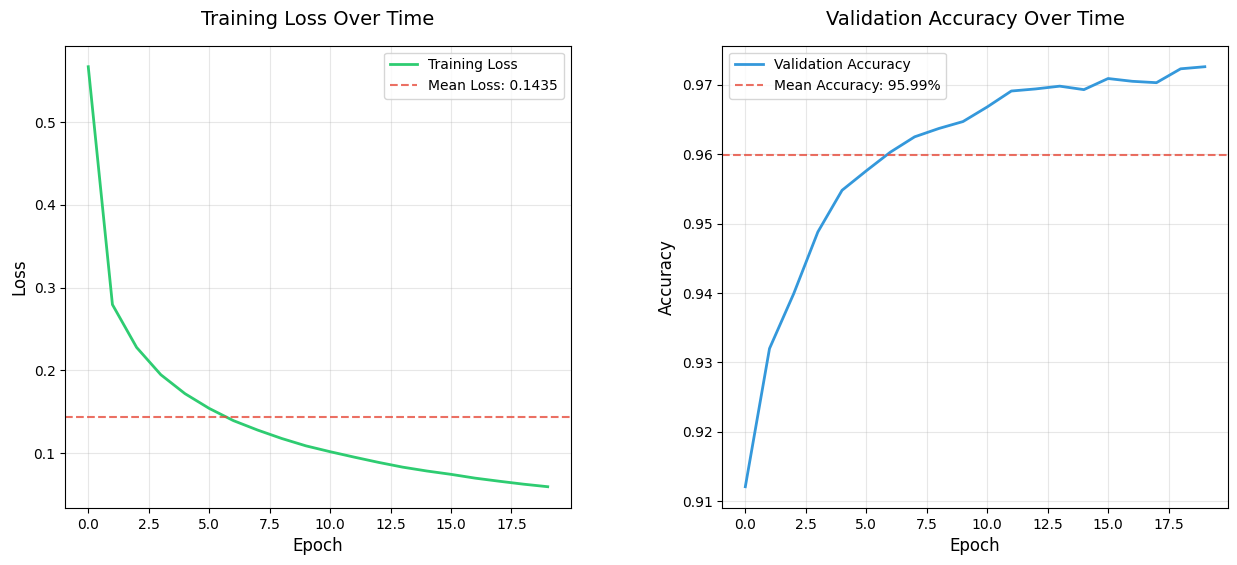


           Training Summary Statistics            
Final Loss: 0.0595
Final Accuracy: 97.26%
Best Accuracy: 97.26%



In [171]:
# Create a figure with specified size and higher DPI for better quality
plt.figure(figsize=(15, 6), dpi=100)

# Calculate mean metrics for reference lines
mean_loss = np.mean(history['loss'])
mean_acc = np.mean(history['val_acc'])

# First subplot: Training Loss (left side)
plt.subplot(1, 2, 1)
plt.plot(history['loss'],
        linewidth=2,
        label='Training Loss',
        color='#2ecc71')  # Green color
plt.axhline(y=mean_loss,
          color='#e74c3c',  # Red color
          linestyle='--',
          alpha=0.8,
          label=f'Mean Loss: {mean_loss:.4f}')
plt.title('Training Loss Over Time', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Second subplot: Validation Accuracy (right side)
plt.subplot(1, 2, 2)
plt.plot(history['val_acc'],
        linewidth=2,
        label='Validation Accuracy',
        color='#3498db')  # Blue color
plt.axhline(y=mean_acc,
          color='#e74c3c',  # Red color
          linestyle='--',
          alpha=0.8,
          label=f'Mean Accuracy: {mean_acc*100:.2f}%')
plt.title('Validation Accuracy Over Time', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add more space between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust this value to increase/decrease spacing
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("Training Summary Statistics".center(50))
print("="*50)
print(f"Final Loss: {history['loss'][-1]:.4f}")
print(f"Final Accuracy: {history['val_acc'][-1]*100:.2f}%")
print(f"Best Accuracy: {max(history['val_acc'])*100:.2f}%")
print("="*50 + "\n")

# 🧪 Test your model on Random data from your test set


           Multiple Number Predictions            



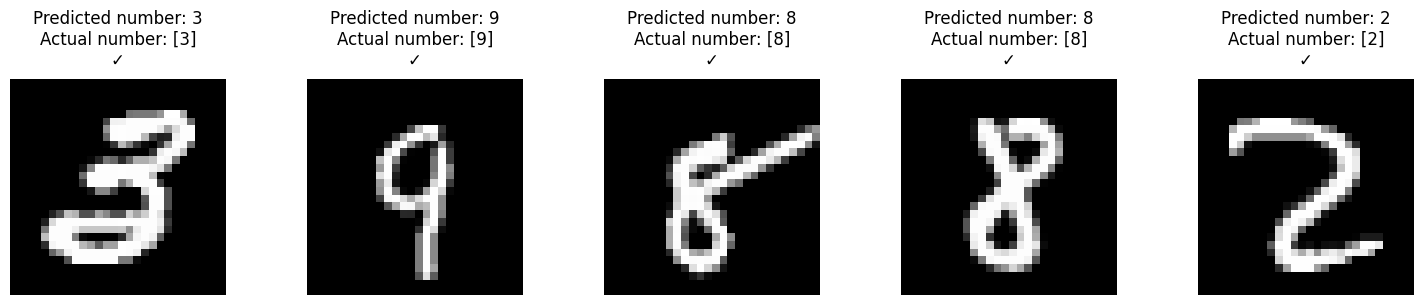


Prediction Details:
--------------------------------------------------
Letter 1: Predicted '3' | Actual '[3]' | 🎯 Correct!
Letter 2: Predicted '9' | Actual '[9]' | 🎯 Correct!
Letter 3: Predicted '8' | Actual '[8]' | 🎯 Correct!
Letter 4: Predicted '8' | Actual '[8]' | 🎯 Correct!
Letter 5: Predicted '2' | Actual '[2]' | 🎯 Correct!


In [175]:
print("\n" + "="*50)
print("Multiple Number Predictions".center(50))
print("="*50 + "\n")

# Create a figure for multiple predictions
plt.figure(figsize=(15, 3))

# Store indices for consistency
indices = [np.random.randint(len(y_test)) for _ in range(5)]
predictions = []
actual_values = []

# Make 5 predictions and show images
for i, idx in enumerate(indices):
    # Create subplot for each image
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.axis('off')

    # Get prediction
    pred = model.predict(x_test[idx].reshape(-1, 1))
    predictions.append(pred)
    actual_values.append(y_test[idx])

    # Set title with prediction status
    is_correct = pred == y_test[idx]
    status_emoji = "✓" if is_correct else "✗"
    plt.title(f'Predicted number: {pred}\nActual number: {y_test[idx]}\n{status_emoji}',
              pad=10)

plt.tight_layout()
plt.show()

# Print summary of predictions using the same indices
print("\nPrediction Details:")
print("-"*50)
for i in range(5):
    is_correct = predictions[i] == actual_values[i]
    status = "🎯 Correct!" if is_correct else "❌ Incorrect!"
    print(f"Letter {i+1}: Predicted '{predictions[i]}' | "
          f"Actual '{actual_values[i]}' | {status}")

## 👥 Team Comments and Conclusions 🌟

During this activity, the basic principles of deep learning were applied to a 70000 images dataset to predict what number is represented in the sample.

We understood the basic structure of a neural network in its purest form.

🌟 ---

 # 📚 **References**

---

## 🎥 **Videos**  
1. Pepe Cantoral, Ph.D. (2021, January 29). *¿Qué hacen las capas de una red neuronal? - Inteligencia Artificial / What do the layers of a neural network do? - Artificial Intelligence* [Video file]. YouTube. https://www.youtube.com/watch?v=jGNYsjHTnho  

2. Pepe Cantoral, Ph.D. (2021, February 2). *Modelo matemático de una neurona artificial - Redes neuronales - (Parte 2) / Mathematical model of an artificial neuron - Neural networks - (Part 2)* [Video file]. YouTube. https://www.youtube.com/watch?v=XoIj-omJAZo  

3. Pepe Cantoral, Ph.D. (2021, February 5). *Función SOFTMAX - Redes neuronales - (Parte 3) / SOFTMAX function - Neural networks - (Part 3)* [Video file]. YouTube. https://www.youtube.com/watch?v=3KhumV1S6vs  

4. Pepe Cantoral, Ph.D. (2021, February 9). *Función de costo - Cross Entropy - Redes neuronales - (Parte 4) / Cost function - Cross entropy - Neural networks - (Part 4)* [Video file]. YouTube. https://www.youtube.com/watch?v=ie-tCP7YYrI  

5. Pepe Cantoral, Ph.D. (2021, February 19). *Gradient descent – Redes neuronales - (Parte 5) / Gradient descent - Neural networks - (Part 5)* [Video file]. YouTube. https://www.youtube.com/watch?v=lnDjwepC-5I  

6. Pepe Cantoral, Ph.D. (2021, February 22). *¿Por qué usamos el gradiente para entrenar redes neuronales? Ejemplo - Deep learning - (Parte 6) / Why do we use gradients to train neural networks? Example - Deep learning - (Part 6)* [Video file]. YouTube. https://www.youtube.com/watch?v=Cr5cYDrMYZQ  

7. Pepe Cantoral, Ph.D. (2021, March 10). *"Backpropagation" – Fundamentos de Deep Learning – (Parte 7) / "Backpropagation" – Foundations of Deep Learning – (Part 7)* [Video file]. YouTube. https://www.youtube.com/watch?v=4nDsiV3GXa8  

8. Pepe Cantoral, Ph.D. (2021, May 15). *¡Red neuronal desde cero estilo framework de Deep Learning! / Neural network from scratch in Deep Learning framework style!* [Video file]. YouTube. https://www.youtube.com/watch?v=_shpKyA89QQ  

9. Pepe Cantoral, Ph.D. (2021, May 18). *¡Red neuronal desde cero estilo framework de Deep Learning - Parte 2! / Neural network from scratch in Deep Learning framework style - Part 2!* [Video file]. YouTube. https://www.youtube.com/watch?v=l2v2mVcOx6o  

10. Pepe Cantoral, Ph.D. (2021, July 6). *¡Red neuronal usando PyTorch! PyTorch tutorial / Neural network using PyTorch! PyTorch tutorial* [Video file]. YouTube. https://www.youtube.com/watch?v=qQELiV1_GHA  

11. Pepe Cantoral, Ph.D. (2021, April 7). *Descargar y procesar MNIST, sólo Python ! -Fundamentos de Deep Learning con Python y PyTorch* [Video file]. YouTube. https://www.youtube.com/watch?v=7cMKAlnSmpM  

---



---

## 📖 **Books**  
1. Raschka, S., Liu, Y., Mirjalili, V., & Dzhulgakov, D. (2022). *Machine learning with PyTorch and Scikit-learn: Develop machine learning and deep learning models with Python*. Packt Publishing. Chapter 11

---

## 📄 **Papers**  
1. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). *Learning representations by back-propagating errors*. Institute for Cognitive Science. https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf  

2. Glorot, X., Bordes, A., & Bengio, Y. (2011). *Deep sparse rectifier neural networks*. http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf  

---

## 🎓 **Live Session Recordings**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *Active class 1 | Welcome session*.  

---

## 📊 **Presentations**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *A brief history of AI*.

---

## 📚 **Web**
1. Ultralitics. (n.d.). *MNIST Dataset*. Retrieved January 21, 2025, from https://docs.ultralytics.com/datasets/classify/mnist/#applications